In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from shapely.geometry import mapping, shape, Point
from shapely.geometry.base import BaseGeometry
from six import string_types

from geopandas import GeoSeries, GeoDataFrame
from geopandas.base import GeoPandasBase
from geopandas.plotting import plot_dataframe
import geopandas.io
import numpy as np
from datetime import timedelta
import datetime
%matplotlib inline

traps = pd.read_csv('assets/train.csv')
spray = pd.read_csv('assets/spray.csv')
weather = pd.read_csv('assets/weather.csv')

In [21]:
# Create GeoDataFrames for spray and trap locations
# use latitude and longitude
spray_map = spray[['Latitude','Longitude']]
spray_map["geometry"] = spray_map.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)
del(spray_map["Latitude"], spray_map["Longitude"])
spray_map = geopandas.GeoDataFrame(spray_map,geometry="geometry")

traps_map = traps[['Latitude','Longitude']]
traps_map["geometry"] = traps_map.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)
del(traps_map["Latitude"], traps_map["Longitude"])
traps_map = geopandas.GeoDataFrame(traps_map,geometry="geometry")

#### Map Chicago Boroughs
##### Goal: map traps and sprayed areas

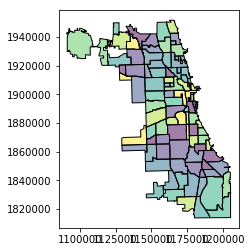

In [38]:
boros = GeoDataFrame.from_file('assets/Neighborhoods_2012b.shp')
boros = geopandas.GeoDataFrame(boros,geometry="geometry")
boros.crs = {"init": "epsg:4326"}
boros.plot()

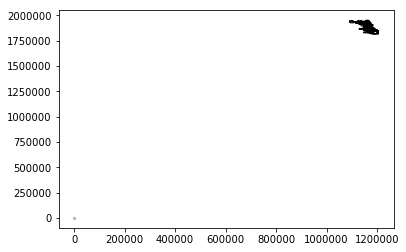

In [39]:
fig, ax = plt.subplots(1)
boros.plot(ax=ax, color="#eeeeee")
traps_map.plot(ax=ax, markersize=1, color="#bbbbbb")
plt.show()